# <b>Real or Fake? Covid-19 Fake News Detection using Natural Processing Language (NLP)



<span style="display:block;text-align:center"><img src="https://ichef.bbci.co.uk/news/976/cpsprodpb/089D/production/_111750220_gettyimages-1215064495.jpg" alt="BBC"
	title="BBC" width="700" height="500" /></span>
    
<div align="center"><i>Source: BBC</i></div>
    

"<a href="https://www.who.int/emergencies/diseases/novel-coronavirus-2019/advice-for-public/myth-busters">Sunny weather</a> cures Covid-19." "Covid-19 is linked to <a href="https://fullfact.org/online/5g-and-coronavirus-conspiracy-theories-came/">5G mobile networks</a>." "<a href="https://www.forbes.com/sites/judystone/2021/09/14/betadine-is-this-weeks-covid-19-cure-vying-with-ivermectin/?sh=6cb39a406986">Ingesting Betadine</a> helps to prevent Covid." 

Are these real or fake?

Amid the Covid-19 pandemic lies another wave of misinformation, to which the World Health Organisation (WHO) has declared the spread of Covid-19 related misinformation an "infodemic". According to <a href="https://www.who.int/health-topics/infodemic">WHO</a>, an infodemic is an overabundance of information, both online and offline, which includes deliberate attempts to disseminate wrong information to undermine the public health response and advance alternative agendas of groups or individuals.

The rise of social media has changed how we perceive and handle information. To many users, social media platforms are where they receive news. However, the increased digital connectivity also has its drawbacks, muddling our ability to discern between real and fake news.

## <b> What is fake news?

Fake news is news, stories or hoaxes created to deliberately misinform or deceive readers. 

Addressing these problems can be challenging as there is no consensus regarding a formal definition of fake news. In some cases, what appears to be fake news may be news satire, which uses exaggeration and introduces non-factual elements that are intended to amuse, rather than to deceive. 

However, most people would agree that fake news constitutes intentionally published falsehoods, although it is often difficult to prove malicious intent. While wider definitions of fake news also include misleading information, the problem is that the notion of “misleading” is highly subjective and dependent on the context of the information.

## <b>Our objective

In this paper, we attempt to develop several machine learning models that classifies news articles as real or fake news. 

The Covid-19 dataset can be downloaded from the link <a href="https://raw.githubusercontent.com/susanli2016/NLP-with-Python/master/data/corona_fake.csv">here</a>.

## <b>The Work Flow

Before starting this paper, we developed an interest in text analytics and wanted to test out the various learnt skillsets from another subject module when we came across text classification models based on Covid-19 news. 
    
Fortunately, resources were aplenty, and our task was then to clean the data, fit the appropriate machine learning models, and assess the models' performances.

In [1]:
# load all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import gensim

from wordcloud import WordCloud, STOPWORDS

from collections import defaultdict, Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/susanli2016/NLP-with-Python/master/data/corona_fake.csv')
df.head()

,title,text,source,label
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,Fake
1,NaN,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,Fake
2,NaN,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,Fake
3,NaN,The Corona virus is a man made virus created i...,JoanneWrightForCongress,Fake
4,NaN,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,Fake


## <b>Data Exploration Part I

<b>Step 1: Basic data exploration</b>
    
As with all exploratory data analysis (EDA), the most fundamental step was to look out the number of feature variables. We found three feature variables: 'title', 'text' and 'source' and one target column 'label'.

<b>Step 2: Check for missing and duplicates values</b>
    
Next, we check for any missing values in the dataset. We found that there were about 10% missing values in the dataset. Out of which, about 3% of the missing values are in the 'source', 'text' and 'label' column, which will be dropped later on. As for the 'title' column, we have chosen to impute the missing values with an empty string. 22 duplicate values will also be removed in this step.

<b>Step 3: Look for discrepancies in the "label" columns.</b>
    
After exploring the target column ('label'), we discovered that there are two different <i> Fake </i> labels. As this is a binary classification problem, we then standardised their labellings to their lowercase form, "fake" and "real".

In [3]:
print("The shape of the dataset is", df.shape, "\n")

The shape of the dataset is (1164, 4) 



In [4]:
df.isnull().any()

title     True
text      True
source    True
label     True
dtype: bool

In [5]:
null = df.isnull().sum().sort_values(ascending=False)
total = df.shape[0]

percent_null = round((df.isnull().sum()/total*100).sort_values(ascending=False),2)
missing_data = pd.concat([null, percent_null], keys=["Total missing", "Percent missing (%)"], axis=1)

print(missing_data)

missing_data.sum()

        Total missing  Percent missing (%)
title              82                 7.04
source             20                 1.72
text               10                 0.86
label               5                 0.43


Total missing          117.00
Percent missing (%)     10.05
dtype: float64

In [6]:
df["label"].value_counts()

TRUE    584
Fake    345
fake    230
Name: label, dtype: int64

In [7]:
df["label"]= df["label"].str.replace("Fake", "fake")
df["label"]= df["label"].str.replace("TRUE", "real")
df["label"].value_counts()

real    584
fake    575
Name: label, dtype: int64

In [8]:
df = df.dropna(subset = ['text'])
df = df.dropna(subset = ['label'])
df = df.dropna(subset = ['source'])
df.shape

(1134, 4)

In [9]:
duplicaterow = df[df.duplicated(keep=False)]
duplicaterow.sort_values("title", inplace=True)
duplicaterow.shape
print("There are", duplicaterow.shape[0], "duplicates in the dataset.")

There are 22 duplicates in the dataset.


In [10]:
# drop duplicates

df.drop_duplicates(keep="first", inplace=True)
duplicaterow = df[df.duplicated(keep=False)]
duplicaterow.sort_values("title", inplace=True)
duplicaterow.shape

(0, 4)

In [11]:
# look at the first 10 rows with missing title
missingtitle = df[df.title.isna()]
missingtitle.head(10)

,title,text,source,label
1,NaN,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,fake
2,NaN,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,fake
3,NaN,The Corona virus is a man made virus created i...,JoanneWrightForCongress,fake
4,NaN,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,fake
6,NaN,Urgent: Health Bulletin to the Public. Ministr...,Ministry of Health,fake
7,NaN,"Pls tell ur families, relatives and friendsMOH...",NWLLAB,fake
8,NaN,SERIOUS EXCELLENT ADVICE by Japanese doctors t...,Japanese doctors treating COVID-19 cases,fake
10,NaN,The new Coronavirus may not show signs of infe...,Taiwan Experts,fake
11,NaN,A vaccine meant for cattle can be used to figh...,facebook,fake
12,NaN,Using a hair dryer to breathe in hot air can c...,Youtube,fake


In [12]:
df['title'].fillna("", inplace=True)
df.head()

,title,text,source,label
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,fake
1,,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,fake
2,,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,fake
3,,The Corona virus is a man made virus created i...,JoanneWrightForCongress,fake
4,,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,fake


In [13]:
# print dataframe shape
df.shape

(1123, 4)

<b>Step 4: Finding word count of the 'text' column</b>

As we were interested in finding out if there was any trend between word count and its label, we appended the length of the text as a new column, 'word_count'. 

In [14]:
# appending the length of text in data
df['word_count'] = df['text'].str.len()
df.head()

,title,text,source,label,word_count
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,fake,387
1,,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,fake,266
2,,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,fake,278
3,,The Corona virus is a man made virus created i...,JoanneWrightForCongress,fake,99
4,,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,fake,137


## <b>Data Exploration Part II

<b>Step 5: Finding the proportion of 'real' and 'fake' news</b>

Next, we plotted a pie chart to look at the proportion of real news and fake news.
50.9% of the dataset is real news and 49.1% of them is fake news.

This is a well-balanced dataset hence resampling techniques are not required.


<b>Step 6: Visualisation by label</b>
Pictures paint a thousand words. Visualisations tell a story to illuminate the key message. We then check if there is any correlation between length of text in each text.

In [15]:
df['label'].value_counts(normalize=True)

real    0.50935
fake    0.49065
Name: label, dtype: float64

In [16]:
# create pie chart for how many tweets per airline

def createPieChart(text):
    Lst = 100*text.value_counts()/len(text)
    
    # set data for pie chart
    
    labels = text.value_counts().index.values
    size = Lst
    colors = ['#66CD00', 'indianred']
    
    # set labels
    fig1, ax1 = plt.subplots()
    ax1.pie(size, labels=labels, autopct='%1.2f%%', colors=colors, shadow=True, startangle=90)
    ax1.axis('equal') # aspect ratio ensures that pie is drawn as circle
    
    plt.show()

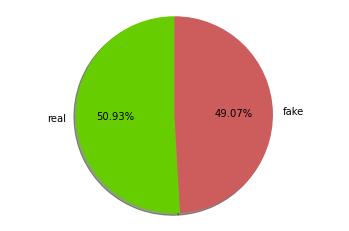

In [17]:
createPieChart(df.label)

In [18]:
# look at the stats of the word count 
df.describe()

,word_count
count,1123.000000
mean,3829.413179
std,4787.134425
min,52.000000
25%,579.000000
50%,1661.000000
75%,5400.500000
max,32671.000000


### <b>Observations:
1. Data is negatively skewed as the median word_count is more than the mean word_count.
2. More values are concentrated on the right side of the distribution graph.

Text(0.5, 0.98, 'Average word length in each news')

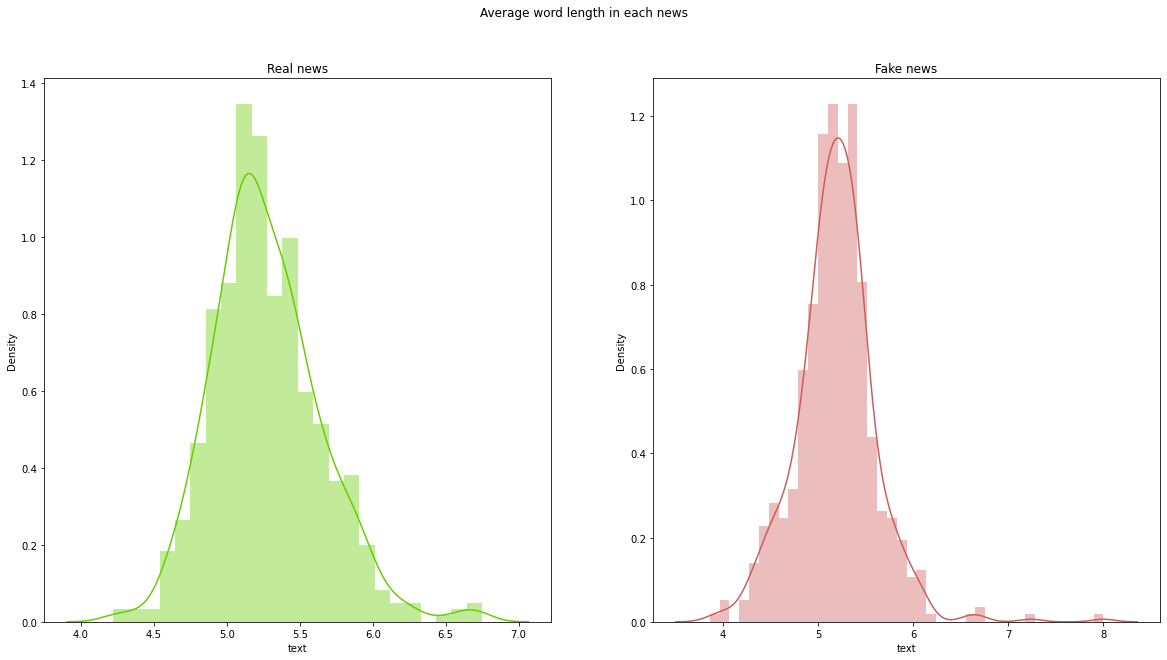

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))

realdist=df[df['label']=='real']['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(realdist.map(lambda x: np.mean(x)),ax=ax1,color='#66CD00')
ax1.set_title('Real news')

fakedist=df[df['label']=='fake']['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(fakedist.map(lambda x: np.mean(x)),ax=ax2,color='indianred')
ax2.set_title('Fake news')

fig.suptitle('Average word length in each news')

In [20]:
real = df[df['label'] == "real"]
fake = df[df['label'] == "fake"]

### <b>Observations:
1. Fake news had fewer words and sentences and that the variance of these values was greater than that in real news. This suggests that the data for real news is less reliable compared to fake news.
2. The mean word length in fake news is slightly less than the mean word length in real news. 

In [21]:
real.describe()

,word_count
count,572.000000
mean,3251.590909
std,4212.917842
min,83.000000
25%,654.000000
50%,1224.500000
75%,4651.750000
max,28681.000000


In [22]:
fake.describe()

,word_count
count,551.000000
mean,4429.257713
std,5255.085477
min,52.000000
25%,489.000000
50%,2632.000000
75%,6632.500000
max,32671.000000


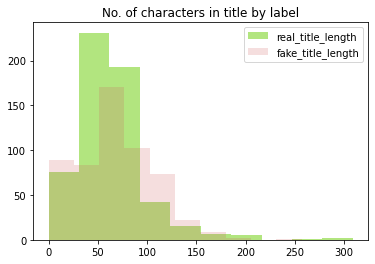

In [23]:
#  the number of characters present in each title by labels

plt.hist(real['title'].str.len(), 
         alpha=0.5,
         color='#66CD00',# the transaparency parameter
         label='real_title_length')
  
plt.hist(fake['title'].str.len(),
         alpha=0.2,
         color='indianred',
         label='fake_title_length')
  
plt.legend(loc='upper right')
plt.title('No. of characters in title by label')
plt.show()

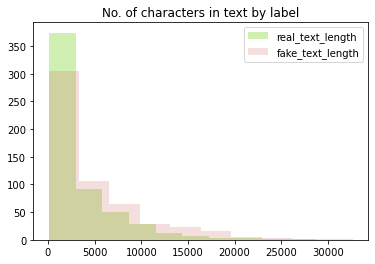

In [24]:
#  the number of characters present in each text by labels
plt.hist(real['text'].str.len(), 
         alpha=0.3,
         color='#66CD00',# the transparency parameter
         label='real_text_length')
  
plt.hist(fake['text'].str.len(),
         alpha=0.2,
         color='indianred',
         label='fake_text_length')
  
plt.legend(loc='upper right')
plt.title('No. of characters in text by label')
plt.show()

In [25]:
# Remove stopwords from title and text by label
news_fake=df[df.label=='fake'].copy()
news_real=df[df.label=='real'].copy()

<AxesSubplot:>

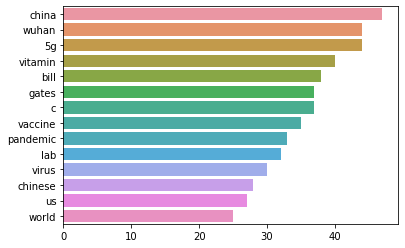

In [26]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['coronavirus', 'covid19'])

news_fake['title'] = news_fake['title'].str.lower()
news_fake['title'] = news_fake.title.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
new = news_fake['title'].str.split()
new = new.values.tolist()
corpus_title_fake=[word for i in new for word in i]

counter=Counter(corpus_title_fake)
most=counter.most_common()
x, y= [], []
for word,count in most[:30]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

Fake news titles tend to be of a clickbait nature, for the purpose of generating web traffic. 

Here, we plot the top common words in fake news titles. No preprocessing of text has been done at this point.

<b>The top 10 words in fake news titles are: 'china', 'wuhan', '5g', 'vitamin', 'bill', 'gates', 'c', 'vaccine', 'pandemic', 'lab'.

<AxesSubplot:>

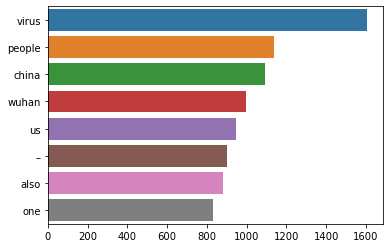

In [27]:
news_fake['text'] = news_fake['text'].str.lower()
news_fake['text'] = news_fake.text.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
new1 = news_fake['text'].str.split()
new1 = new1.values.tolist()
corpus_text_fake=[word for i in new1 for word in i]

counter=Counter(corpus_text_fake)
most=counter.most_common()
x, y= [], []
for word,count in most[:50]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

<b>The top 8 words in fake news texts are: 'virus', 'people', 'china', 'wuhan', 'us', '-', 'also', 'one'.

<AxesSubplot:>

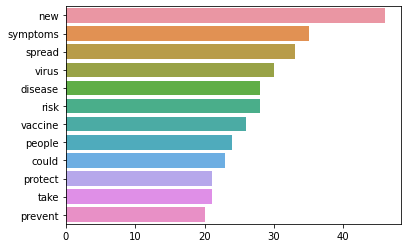

In [28]:
news_real['title'] = news_real['title'].str.lower()
news_real['title'] = news_real.title.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
new2 = news_real['title'].str.split()
new2 = new2.values.tolist()
corpus_title_real=[word for i in new2 for word in i]

counter=Counter(corpus_title_real)
most=counter.most_common()
x, y= [], []
for word,count in most[:50]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

<b>The top 10 words in real news titles are: 'new', 'symptoms', 'spread', 'virus', 'disease', 'risk', 'vaccine', 'people', 'could', 'protect'.

<AxesSubplot:>

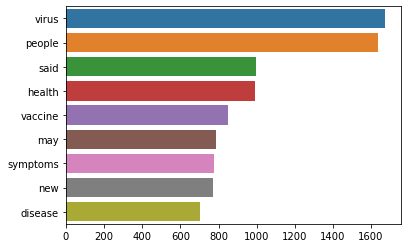

In [29]:
news_real['text'] = news_real['text'].str.lower()
news_real['text'] = news_real.text.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
new3 = news_real['text'].str.split()
new3 = new3.values.tolist()
corpus_text_real=[word for i in new3 for word in i]

counter=Counter(corpus_text_real)
most=counter.most_common()
x, y= [], []
for word,count in most[:50]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

<b>The top 9 words in fake news texts are: 'virus', 'people', 'said', 'health', 'vaccine', 'may', 'symptoms', 'news', 'disease'.

What about bigrams? 

Bigrams are useful for our analysis as some words are commonly found together than apart. 
For example, 'bill gates' and 'social distancing'.

In [30]:
# Ngram analysis function

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

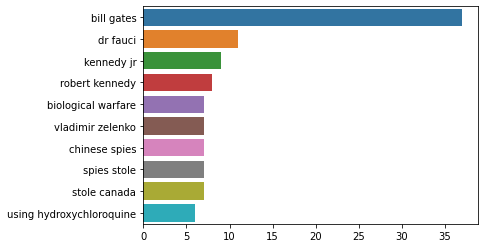

In [31]:
# Ngram analysis corpus_title_fake

news_fake['title'] = news_fake['title'].str.lower()
news_fake['title'] = news_fake.title.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
news_fake['title'] = news_fake['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

top_n_bigrams=get_top_ngram(news_fake['title'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

<b>The top 10 bigrams in fake news titles are: 'bill gates', 'dr fauci', 'kennedy jr', 'robert kennedy', 'biological warfare', 'vladimir zelenko', 'chinese spies', 'spies stole', 'stole canada' and 'using hydroxychloroquine'.

### <b>Observations:
1. We observe that the bigrams in fake news titles seemed to revolve around influential figures.
2. Further research suggests that these Covid-19 fake news are related to conspiracy theories involving these influential figures. For example, fake news suggesting <a href="https://www.bbc.com/news/52847648">Bill Gates</a> orchestrated the Covid-19 pandemic, <a href="https://www.bbc.com/news/world-us-canada-57336280">a leaked email by Dr Fauci</a> on the theory that Covid-19 may have leaked from a laboratory in Wuhan, China and <a href="https://www.theguardian.com/technology/2021/feb/10/instagram-removes-anti-vaxxer-robert-f-kennedy-jr">Robert Kennedy Jr.</a> repeatedly sharing misinformation on Covid-19 vaccines are some of the examples.

<AxesSubplot:>

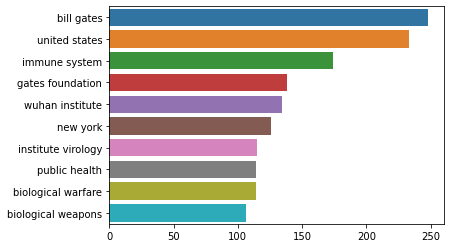

In [32]:
# Ngram analysis corpus_text_fake

news_fake['text'] = news_fake['text'].str.lower()
news_fake['text'] = news_fake.text.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
news_fake['text'] = news_fake['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

top_n_bigrams=get_top_ngram(news_fake['text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

<b>The top 10 bigrams in fake new texts are quite similar: 'bill gates', 'united states', 'immune system', 'gates foundation', 'wuhan institute', 'new york', 'institute virology', 'public health', 'biological warfare' and 'biological weapons'.

<AxesSubplot:>

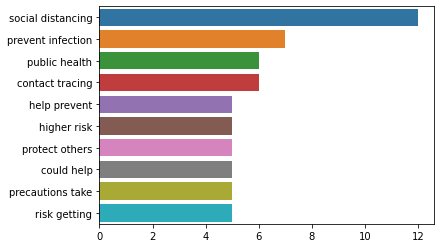

In [33]:
# Ngram analysis corpus_title_real

news_real['title'] = news_real['title'].str.lower()
news_real['title'] = news_real.title.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
news_real['title'] = news_real['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

top_n_bigrams=get_top_ngram(news_real['title'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

<b>The top 10 bigrams in real news titles are: 'social distancing', 'prevent infection', 'public health', 'contact tracing', 'help prevent', 'higher risk', 'protect others', 'could help', 'precautions take' and 'risk getting'.

<AxesSubplot:>

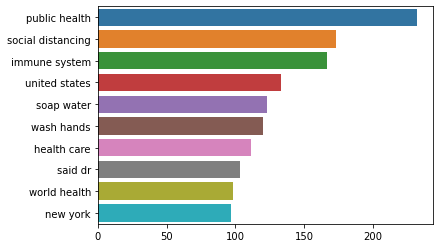

In [34]:
# Ngram analysis corpus_text_real

news_real['text'] = news_real['text'].str.lower()
news_real['text'] = news_real.text.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
news_real['text'] = news_real['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

top_n_bigrams=get_top_ngram(news_real['text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

<b>Similarly, the top 10 bigrams in real news texts are: 'public health', 'social distancing', 'immune system', 'united states', 'soap water', 'wash hands', 'health care', 'said dr', 'world health' and 'new york'.</b>

The bigrams found in real news tend to be presented more objectively. "Social distancing", "contact tracing", "wash hands" and "soap water" are some of the Covid-19 preventive measures that are scientifically proven.

<h3>In this section, we create wordclouds for real and fake news for easier visualisation.</h3>

In [35]:
# Function for word cloud
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

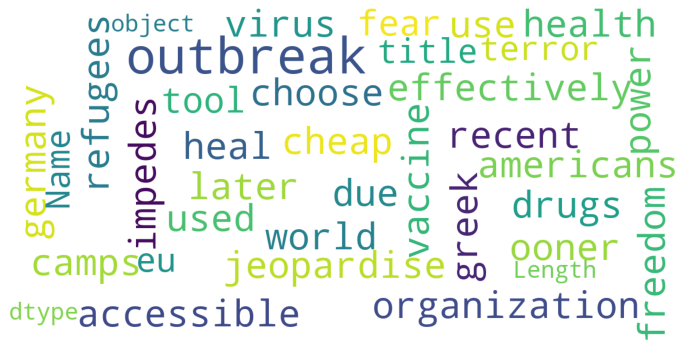

In [36]:
# Word cloud for corpus_title_fake
show_wordcloud(news_fake['title'])

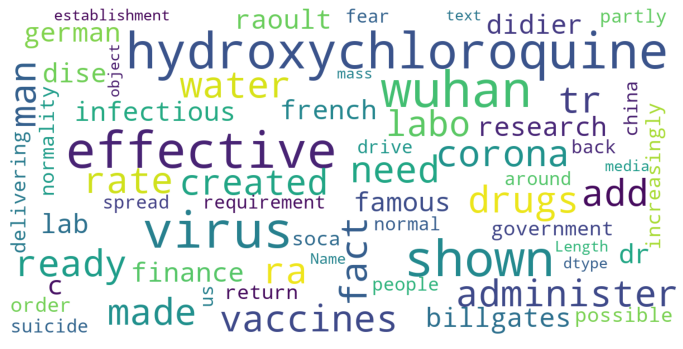

In [37]:
# Word cloud for corpus_text_fake
show_wordcloud(news_fake['text'])

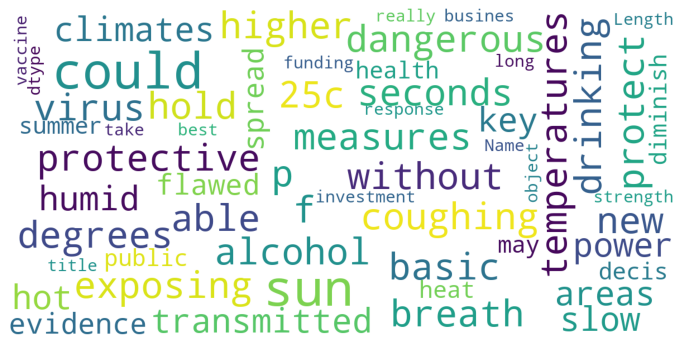

In [38]:
# Word cloud for corpus_title_real
show_wordcloud(news_real['title'])

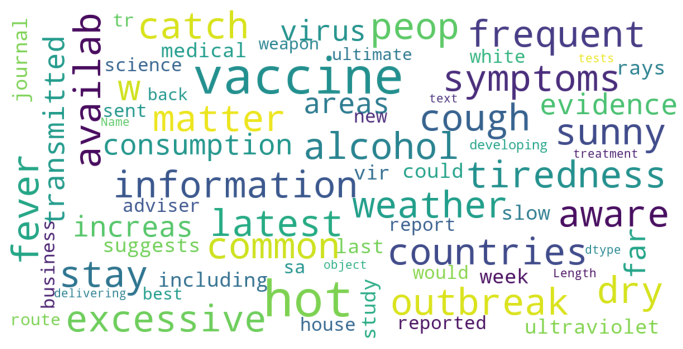

In [39]:
# Word cloud for corpus_text_real
show_wordcloud(news_real['text'])

### <b> Observations:
1. The word  'hydroxychloroquine' was observed in fake titles and news. The anti-malaria drug  'hydroxychloroquine' likely trended due to news that it would reduce the risk of Covid-19. This was later debunked by the <a href="https://www.fda.gov/drugs/drug-safety-and-availability/fda-cautions-against-use-hydroxychloroquine-or-chloroquine-covid-19-outside-hospital-setting-or">U.S. Food and Drug Administration (FDA)</a> to be untrue.
2. Country-related words like 'French', 'Greek', 'German' and 'Americans' are more frequently found in fake news titles and texts.
3. On the contrary, real titles and news saw little to no indication of country-related words. Most of the real news consist of: 
    
      - Covid-19 symptoms ('cough', 'tiredness', 'dry', 'fever')
      - factual information pertaining to preventive measures ('vaccine', 'protect', 'measures') and    
      - its modes of transmission ('seconds', 'temperatures', 'breath') supported with 'evidence'. 

<b> <h2>Text cleaning and preprocessing</h2>

We are going to combine the text and title to form a new column - titleNtext.

In [40]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                   "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                    "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have" } 

In [41]:
lemma = WordNetLemmatizer()
df['titleNtext'] = df['title'] + " " + df['text']

def process_message(text):
    # remove all the special characters
    new_text = re.sub("[^a-zA-Z]", " ",text)
    # remove urls
    new_text = text.replace("http", " ")
    new_text = text.replace("https", " ")
    # convert all letters to lower case
    words = new_text.lower().split()
    # remove stop words
    words = [w for w in words if not w in stopwords]        
    return (" ".join(words))

def clean(doc):
    punc_free = ''.join([ch for ch in doc.lower() if ch not in string.punctuation])
    digit_free = ' '.join([i for i in punc_free.split() if i.isalpha() if len(i)>=3])
    stop_free = ' '.join([i for i in digit_free.split() if i not in stopwords])
    contraction = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in stop_free.split(" ")])
    normalized = ' '.join(lemma.lemmatize(word) for word in contraction.split())
    return normalized

In [42]:
df.head()

,title,text,source,label,word_count,titleNtext
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,fake,387,Due to the recent outbreak for the Coronavirus...
1,,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,fake,266,Hydroxychloroquine has been shown to have a 1...
2,,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,fake,278,Fact: Hydroxychloroquine has been shown to ha...
3,,The Corona virus is a man made virus created i...,JoanneWrightForCongress,fake,99,The Corona virus is a man made virus created ...
4,,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,fake,137,Doesn’t @BillGates finance research at the Wu...


In [43]:
df['titleNtext'] = df['titleNtext'].apply(lambda x: clean(process_message(str(x))))
df = df.drop(['text', 'title'], axis=1)
df.head()

,source,label,word_count,titleNtext
0,coronavirusmedicalkit.com,fake,387,due recent outbreak world health organization ...
1,RudyGiuliani,fake,266,hydroxychloroquine shown effective rate treati...
2,CharlieKirk,fake,278,fact hydroxychloroquine shown effective rate t...
3,JoanneWrightForCongress,fake,99,corona virus man made virus created wuhan labo...
4,JoanneWrightForCongress,fake,137,billgates finance research wuhan lab corona vi...


In [44]:
r_words = df[df.label=='real'].titleNtext.apply(lambda x: [word.lower() for word in x.split()])
real_words = Counter()

for msg in r_words:
    real_words.update(msg)
    
print(real_words.most_common(50))

[('virus', 2020), ('people', 1668), ('vaccine', 1253), ('health', 1007), ('said', 996), ('disease', 919), ('symptom', 850), ('new', 816), ('may', 793), ('case', 688), ('spread', 685), ('also', 679), ('patient', 637), ('infection', 609), ('one', 604), ('could', 594), ('infected', 552), ('risk', 500), ('study', 496), ('hand', 495), ('human', 473), ('time', 468), ('person', 463), ('public', 457), ('get', 455), ('like', 449), ('need', 447), ('medical', 425), ('would', 422), ('outbreak', 418), ('contact', 414), ('many', 412), ('drug', 402), ('day', 399), ('respiratory', 381), ('even', 376), ('help', 373), ('country', 373), ('test', 373), ('pandemic', 371), ('say', 368), ('use', 361), ('take', 358), ('make', 358), ('cause', 355), ('home', 354), ('treatment', 350), ('number', 338), ('china', 338), ('first', 335)]


In [45]:
f_words = df[df.label=='fake'].titleNtext.apply(lambda x: [word.lower() for word in x.split()])
fake_words = Counter()

for msg in f_words:
    fake_words.update(msg)
    
print(fake_words.most_common(50))

[('virus', 2101), ('vaccine', 1296), ('people', 1173), ('china', 1162), ('wuhan', 1048), ('also', 881), ('one', 875), ('world', 842), ('new', 840), ('vitamin', 831), ('chinese', 722), ('health', 711), ('disease', 695), ('case', 616), ('may', 606), ('would', 606), ('research', 599), ('time', 588), ('pandemic', 581), ('state', 577), ('gate', 573), ('human', 564), ('lab', 563), ('even', 552), ('patient', 537), ('death', 534), ('flu', 530), ('many', 527), ('could', 515), ('system', 511), ('government', 495), ('first', 466), ('like', 451), ('year', 448), ('bill', 446), ('global', 444), ('infection', 434), ('million', 415), ('outbreak', 414), ('said', 414), ('biological', 413), ('study', 408), ('country', 401), ('used', 397), ('get', 386), ('institute', 383), ('medium', 378), ('report', 374), ('sars', 371), ('scientist', 370)]


### <b>Tokenize all words

In [46]:
# calculate the number of occurence of each word in the entire list of words
all_words = [word.lower() for sent in df['titleNtext'] for word in word_tokenize(sent) if word not in stopwords if len(word)>=3]

## <b>Create Frequency Distribution of all words</b>

Frequency distribution calculates the number of occurence of each word in the entire list of words.


<FreqDist with 26872 samples and 362911 outcomes>


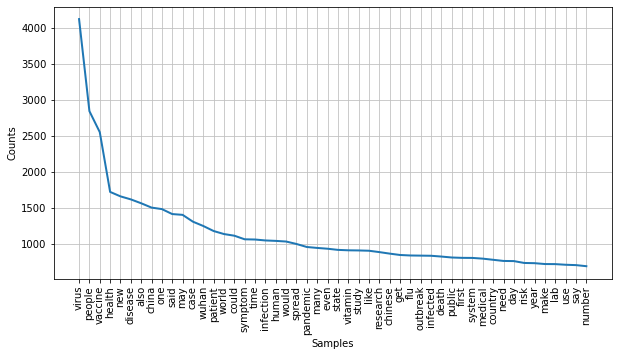

In [47]:
all_words_frequency = FreqDist(all_words)
print (all_words_frequency)

# create a function to plot the frequency, make it a function as we will be re-using it later.
def plot_frequency(freq):
    plt.figure(figsize=(10,5))
    freq.plot(50, cumulative=False)
    plt.show()

plot_frequency(all_words_frequency)

In [48]:
# print 10 most frequently occurring words
print ("\nTop 10 most frequently occurring words")
print (all_words_frequency.most_common(10))

# print 10 least frequently occurring words
print ("\nTop 10 least frequently occurring words")
print (all_words_frequency.most_common()[-10:])


Top 10 most frequently occurring words
[('virus', 4121), ('people', 2841), ('vaccine', 2549), ('health', 1718), ('new', 1656), ('disease', 1614), ('also', 1560), ('china', 1500), ('one', 1479), ('said', 1410)]

Top 10 least frequently occurring words
[('zuckerberg', 1), ('madonnasince', 1), ('shortest', 1), ('treatmentsprivatesector', 1), ('makeorbreak', 1), ('lateclinical', 1), ('publiceducation', 1), ('privatesector', 1), ('parallelonce', 1), ('costeffective', 1)]


## <b> Using the POS-tagger in the NLTK library to tag the words
The primary target of Part-of-Speech (POS) tagging is to <b>identify the grammatical group of a given word</b>. \
Whether it is a NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS, etc. based on the context. 

POS Tagging looks for relationships within the sentence and assigns a corresponding tag to the word.

Before doing POS, we tokenize and perform lowercase to the data first.

In [49]:
from nltk.tokenize import word_tokenize, sent_tokenize

def tagPOS(text):
    tokenized = sent_tokenize(text.lower()) 
    tagged_text = []

    for i in tokenized: 
        # Word tokenizers is used to find the words  
        # and punctuation in a string 
        wordsList = nltk.word_tokenize(i) 

        # removing stop words from wordList 
        wordsList = [w for w in wordsList if not w in stopwords]  

        #  Using a Tagger. Which is part-of-speech tagger or POS-tagger.  
        tagged = nltk.pos_tag(wordsList) 
        tagged_text.extend(tagged)

    return tagged_text

# next we will use lambda to apply the tagPOS function to each review.

df['titleNtext_POS'] = df['titleNtext'].apply(lambda x: tagPOS(x))  
df.head()

,source,label,word_count,titleNtext,titleNtext_POS
0,coronavirusmedicalkit.com,fake,387,due recent outbreak world health organization ...,"[(due, JJ), (recent, JJ), (outbreak, JJ), (wor..."
1,RudyGiuliani,fake,266,hydroxychloroquine shown effective rate treati...,"[(hydroxychloroquine, NN), (shown, VBN), (effe..."
2,CharlieKirk,fake,278,fact hydroxychloroquine shown effective rate t...,"[(fact, NN), (hydroxychloroquine, VB), (shown,..."
3,JoanneWrightForCongress,fake,99,corona virus man made virus created wuhan labo...,"[(corona, NN), (virus, NN), (man, NN), (made, ..."
4,JoanneWrightForCongress,fake,137,billgates finance research wuhan lab corona vi...,"[(billgates, NNS), (finance, VBP), (research, ..."


### <b> To find specify tags from the tagged text</b>
We all know that sentences are made up of words belonging to different Parts of Speech (POS). There are eight different POS in the English language: noun, pronoun, verb, adjective, adverb, preposition, conjunction, and intersection.

The POS determines how a specific word functions in meaning in a given sentence. \
For example, in the sentence, "I saw a bear", "bear" is used as a noun. In another sentence, "Your effort will bear fruits", "bear" is used as a verb.

The POS tag of a word bears significance (<i>no pun intended</i>) when it comes to understanding the meaning of a sentence. Understandably, to extract meaningful information from our text, we can leverage them. 

In [50]:
from textblob import TextBlob

def get_adjectives(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag == "JJ"]

def get_nouns(text):
    blob = TextBlob(text)
    return [word for (word,tag) in blob.tags if tag == "NN"]

df['adjectives'] = df['titleNtext'].apply(get_adjectives)
df['nouns'] = df['titleNtext'].apply(get_nouns)
df.head()

,source,label,word_count,titleNtext,titleNtext_POS,adjectives,nouns
0,coronavirusmedicalkit.com,fake,387,due recent outbreak world health organization ...,"[(due, JJ), (recent, JJ), (outbreak, JJ), (wor...","[due, recent, outbreak, vaccine, kit, add, rea...","[world, health, organization, pay, water, drug..."
1,RudyGiuliani,fake,266,hydroxychloroquine shown effective rate treati...,"[(hydroxychloroquine, NN), (shown, VBN), (effe...","[effective, democrat, democrat, okay, mean]","[hydroxychloroquine, rate, gretchen, whitmer, ..."
2,CharlieKirk,fake,278,fact hydroxychloroquine shown effective rate t...,"[(fact, NN), (hydroxychloroquine, VB), (shown,...","[effective, democrat, democrat, okay, mean]","[fact, rate, gretchen, whitmer, doctor, prescr..."
3,JoanneWrightForCongress,fake,99,corona virus man made virus created wuhan labo...,"[(corona, NN), (virus, NN), (man, NN), (made, ...",[wuhan],"[corona, virus, man, virus, laboratory, ask]"
4,JoanneWrightForCongress,fake,137,billgates finance research wuhan lab corona vi...,"[(billgates, NNS), (finance, VBP), (research, ...",[good],"[research, wuhan, lab, corona, virus, friend, ..."


<a href="https://www.cs.uic.edu/~liub/FBS/NLP-handbook-sentiment-analysis.pdf">Research</a> has shown the presence of adjectives and adverbs is usually a good indicator of text subjectivity. 

In other words, statements that use adjectives like “interesting,” “problematic” and “awesome” might be more likely to convey a subjective point of view than statements that do not include those adjectives.

Next, we will define a findtags function to find specify tag from the tagged text.\
This findtags function will return the top N words based on the POS tag. We can define N to return more words if needed.

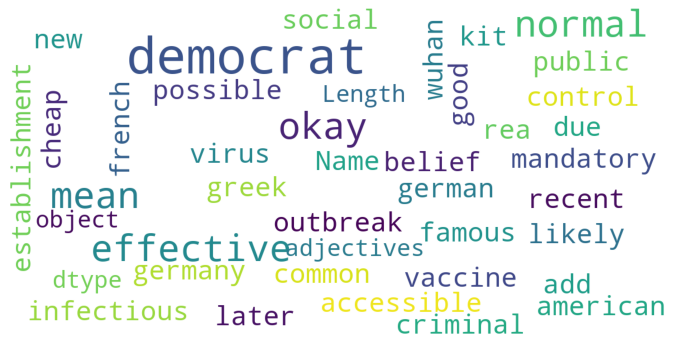

In [51]:
# Word cloud for fake adjectives in df['adjectives']
show_wordcloud(df['adjectives'].loc[df['label']=='fake'])

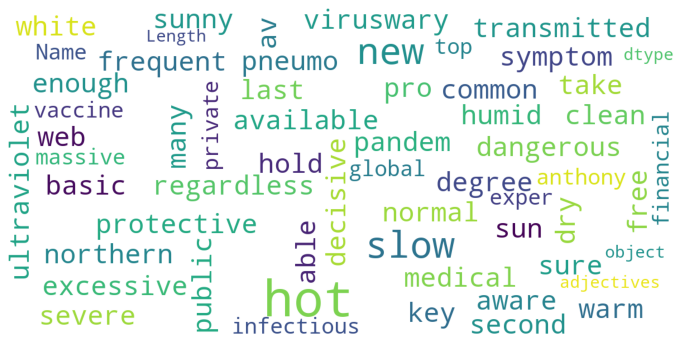

In [52]:
# Word cloud for real adjectives in df['adjectives']
show_wordcloud(df['adjectives'].loc[df['label']=='real'])

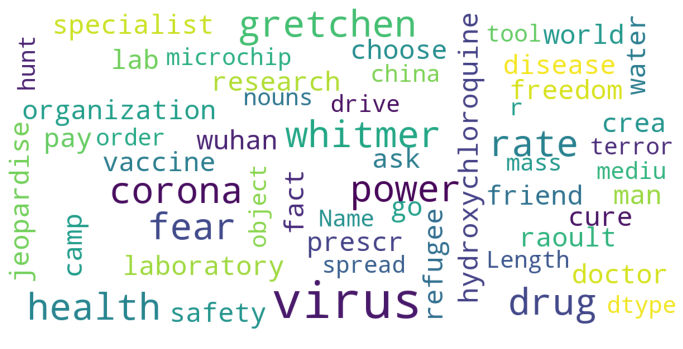

In [53]:
# Word cloud for fake nouns in df['nouns']
show_wordcloud(df['nouns'].loc[df['label']=='fake'])

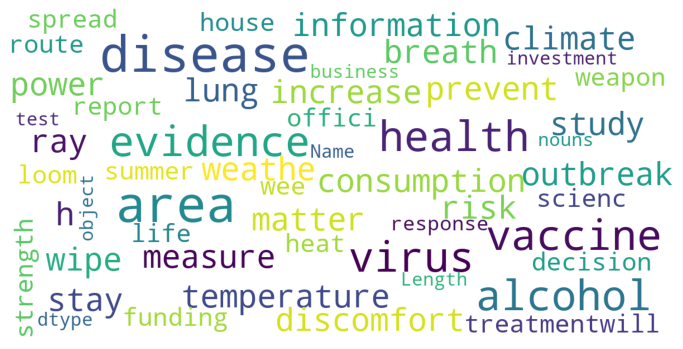

In [54]:
# Word cloud for real nouns in df['nouns']
show_wordcloud(df['nouns'].loc[df['label']=='real'])

## <b>Baseline Model using CountVectorizer</b>

When comparing various machine learning algorithms, baseline provides a point of reference to compare. 

We first start with a <b>Naive Bayes classifier</b>, which provides a nice baseline for this task.

We are interested in building a baseline models using other NLP processing techniques, such as POS tagging. 

We then create subdatasets based on: 
   - adjectives (titleNtext_adj) only
   - nouns (titleNtext_nouns) only
   - adjectives and nouns (titleNtext_adj_nn)
   - all POS tags (titleNtext)

<h2><b>Model Building with titleNtext_adj</h2>

In [55]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics

In [56]:
df['titleNtext_adj'] = df['adjectives'].apply(lambda x: clean(process_message(str(x))))

Before we can train any model, we first consider consider a 70:30 train/test split.

Accuracy: 0.828


Text(0.5, 15.0, 'Predicted label')

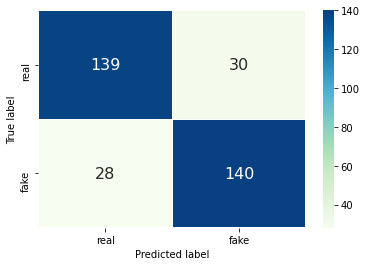

In [57]:
X_adj = df['titleNtext_adj']
y_adj = df['label']

X_train_adj, X_test_adj, y_train_adj, y_test_adj = train_test_split(X_adj, y_adj,test_size=0.3, random_state=123)

vect_adj = CountVectorizer(stop_words='english', ngram_range=(1,2), max_df=0.3)
count_train_adj = vect_adj.fit_transform(X_train_adj)
count_test_adj = vect_adj.transform(X_test_adj)

X_train_dtm_adj = vect_adj.transform(X_train_adj)
X_test_dtm_adj = vect_adj.transform(X_test_adj)

tfidf_transformer_adj = TfidfTransformer()
tfidf_transformer_adj.fit(X_train_dtm_adj)
tfidf_transformer_adj.transform(X_train_dtm_adj)

nb_adj = MultinomialNB()
nb_adj.fit(count_train_adj, y_train_adj)
y_pred_adj = nb_adj.predict(count_test_adj)
score_adj = accuracy_score(y_test_adj, y_pred_adj)
print("Accuracy: {}".format(round(score_adj,3)))
cm_adj = confusion_matrix(y_test_adj, y_pred_adj, labels=['real', 'fake'])

sns.heatmap(cm_adj, annot=True,fmt='d', xticklabels=['real', 'fake'], yticklabels=['real', 'fake'], linewidths=.1, cmap="GnBu", annot_kws={"size": 16}) # font size
plt.ylabel("True label")
plt.xlabel("Predicted label")

In [58]:
print(metrics.classification_report(y_test_adj, y_pred_adj))

              precision    recall  f1-score   support

        fake       0.82      0.83      0.83       168
        real       0.83      0.82      0.83       169

    accuracy                           0.83       337
   macro avg       0.83      0.83      0.83       337
weighted avg       0.83      0.83      0.83       337



<h2><b>Model Building with titleNtext_nouns</h2>

In [59]:
df['titleNtext_nouns'] = df['nouns'].apply(lambda x: clean(process_message(str(x))))

Accuracy: 0.855


Text(0.5, 15.0, 'Predicted label')

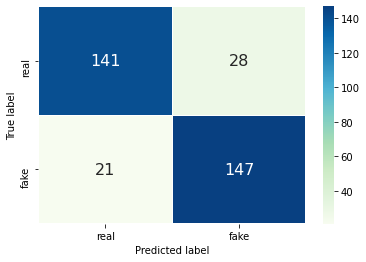

In [60]:
X_nn = df['titleNtext_nouns']
y_nn = df['label']

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn,test_size=0.3, random_state=123)

vect_nn = CountVectorizer(stop_words='english', ngram_range=(1,2), max_df=0.3)
count_train_nn = vect_nn.fit_transform(X_train_nn)
count_test_nn = vect_nn.transform(X_test_nn)

X_train_dtm_nn = vect_nn.transform(X_train_nn)
X_test_dtm_nn = vect_nn.transform(X_test_nn)

tfidf_transformer_nn = TfidfTransformer()
tfidf_transformer_nn.fit(X_train_dtm_nn)
tfidf_transformer_nn.transform(X_train_dtm_nn)

nb_nn = MultinomialNB()
nb_nn.fit(count_train_nn, y_train_nn)
y_pred_nn = nb_nn.predict(count_test_nn)
score_nn = accuracy_score(y_test_nn, y_pred_nn)
print("Accuracy: {}".format(round(score_nn,3)))
cm_nn = confusion_matrix(y_test_nn, y_pred_nn, labels=['real', 'fake'])

sns.heatmap(cm_nn, annot=True,fmt='d', xticklabels=['real', 'fake'], yticklabels=['real', 'fake'], linewidths=.1, cmap="GnBu", annot_kws={"size": 16}) # font size
plt.ylabel("True label")
plt.xlabel("Predicted label")

In [61]:
print(metrics.classification_report(y_test_nn, y_pred_nn))

              precision    recall  f1-score   support

        fake       0.84      0.88      0.86       168
        real       0.87      0.83      0.85       169

    accuracy                           0.85       337
   macro avg       0.86      0.85      0.85       337
weighted avg       0.86      0.85      0.85       337



<h2><b>Model Building with titleNtext_adj_nn</h2>

In [62]:
df['titleNtext_adj_nn'] = df['titleNtext_adj'] + df['titleNtext_nouns']
df.head()

,source,label,word_count,titleNtext,titleNtext_POS,adjectives,nouns,titleNtext_adj,titleNtext_nouns,titleNtext_adj_nn
0,coronavirusmedicalkit.com,fake,387,due recent outbreak world health organization ...,"[(due, JJ), (recent, JJ), (outbreak, JJ), (wor...","[due, recent, outbreak, vaccine, kit, add, rea...","[world, health, organization, pay, water, drug...",due recent outbreak vaccine kit add ready chem...,world health organization pay water drug vacci...,due recent outbreak vaccine kit add ready chem...
1,RudyGiuliani,fake,266,hydroxychloroquine shown effective rate treati...,"[(hydroxychloroquine, NN), (shown, VBN), (effe...","[effective, democrat, democrat, okay, mean]","[hydroxychloroquine, rate, gretchen, whitmer, ...",effective democrat democrat okay mean,hydroxychloroquine rate gretchen whitmer docto...,effective democrat democrat okay meanhydroxych...
2,CharlieKirk,fake,278,fact hydroxychloroquine shown effective rate t...,"[(fact, NN), (hydroxychloroquine, VB), (shown,...","[effective, democrat, democrat, okay, mean]","[fact, rate, gretchen, whitmer, doctor, prescr...",effective democrat democrat okay mean,fact rate gretchen whitmer doctor prescribe tr...,effective democrat democrat okay meanfact rate...
3,JoanneWrightForCongress,fake,99,corona virus man made virus created wuhan labo...,"[(corona, NN), (virus, NN), (man, NN), (made, ...",[wuhan],"[corona, virus, man, virus, laboratory, ask]",wuhan,corona virus man virus laboratory ask,wuhancorona virus man virus laboratory ask
4,JoanneWrightForCongress,fake,137,billgates finance research wuhan lab corona vi...,"[(billgates, NNS), (finance, VBP), (research, ...",[good],"[research, wuhan, lab, corona, virus, friend, ...",good,research wuhan lab corona virus friend gate,goodresearch wuhan lab corona virus friend gate


Accuracy: 0.881


Text(0.5, 15.0, 'Predicted label')

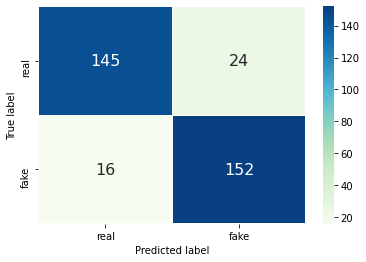

In [63]:
X_adj_nn = df['titleNtext_adj_nn']
y_adj_nn = df['label']

X_train_adj_nn, X_test_adj_nn, y_train_adj_nn, y_test_adj_nn = train_test_split(X_adj_nn, y_adj_nn,test_size=0.3, random_state=123)

vect_adj_nn = CountVectorizer(stop_words='english', ngram_range=(1,2), max_df=0.3)
count_train_adj_nn = vect_adj_nn.fit_transform(X_train_adj_nn)
count_test_adj_nn = vect_adj_nn.transform(X_test_adj_nn)

X_train_dtm_adj_nn = vect_adj_nn.transform(X_train_adj_nn)
X_test_dtm_adj_nn = vect_adj_nn.transform(X_test_adj_nn)

tfidf_transformer_adj_nn = TfidfTransformer()
tfidf_transformer_adj_nn.fit(X_train_dtm_adj_nn)
tfidf_transformer_adj_nn.transform(X_train_dtm_adj_nn)

nb_adj_nn = MultinomialNB()
nb_adj_nn.fit(count_train_adj_nn, y_train_adj_nn)
y_pred_adj_nn = nb_adj_nn.predict(count_test_adj_nn)
score_adj_nn = accuracy_score(y_test_adj_nn, y_pred_adj_nn)
print("Accuracy: {}".format(round(score_adj_nn,3)))
cm_adj_nn = confusion_matrix(y_test_adj_nn, y_pred_adj_nn, labels=['real', 'fake'])

sns.heatmap(cm_adj_nn, annot=True,fmt='d', xticklabels=['real', 'fake'], yticklabels=['real', 'fake'], linewidths=.1, cmap="GnBu", annot_kws={"size": 16}) # font size
plt.ylabel("True label")
plt.xlabel("Predicted label")

In [64]:
print(metrics.classification_report(y_test_adj_nn, y_pred_adj_nn))

              precision    recall  f1-score   support

        fake       0.86      0.90      0.88       168
        real       0.90      0.86      0.88       169

    accuracy                           0.88       337
   macro avg       0.88      0.88      0.88       337
weighted avg       0.88      0.88      0.88       337



The baseline accuracy scores for the following training datasets are as follows:   

   - adjectives only (titleNtext_adj) :<b> 0.828 </b>
   - nouns only (titleNtext_nouns) :<b> 0.855</b>
   - adjectives and nouns (titleNtext_adj_nn) :<b> 0.881</b>


Last but not least, we build a model based on all POS tags.

<h2><b>Model Building with titleNtext</h2>

In [65]:
X = df['titleNtext']
y = df['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=123)

In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(786,)
(337,)
(786,)
(337,)


In [67]:
vect = CountVectorizer(stop_words='english', ngram_range=(1,2), max_df=0.3)
count_train = vect.fit_transform(X_train)
count_test = vect.transform(X_test)

In [68]:
# learn training data vocabulary, then use it to create a document term matrix

X_train_dtm = vect.transform(X_train)
X_train_dtm

<786x172647 sparse matrix of type '<class 'numpy.int64'>'
	with 348143 stored elements in Compressed Sparse Row format>

In [69]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<337x172647 sparse matrix of type '<class 'numpy.int64'>'
	with 94787 stored elements in Compressed Sparse Row format>

In [70]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<786x172647 sparse matrix of type '<class 'numpy.float64'>'
	with 348143 stored elements in Compressed Sparse Row format>

Accuracy: 0.896


Text(0.5, 15.0, 'Predicted label')

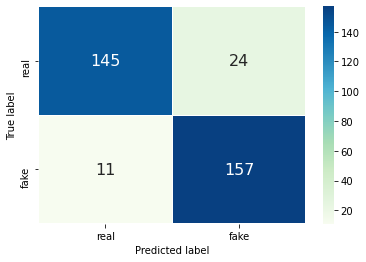

In [71]:
nb = MultinomialNB()
nb.fit(count_train, y_train)
y_pred = nb.predict(count_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(round(score,3)))
cm = confusion_matrix(y_test, y_pred, labels=['real', 'fake'])

sns.heatmap(cm, annot=True,fmt='d', xticklabels=['real', 'fake'], yticklabels=['real', 'fake'], linewidths=.1, cmap="GnBu", annot_kws={"size": 16}) # font size
plt.ylabel("True label")
plt.xlabel("Predicted label")

In [72]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        fake       0.87      0.93      0.90       168
        real       0.93      0.86      0.89       169

    accuracy                           0.90       337
   macro avg       0.90      0.90      0.90       337
weighted avg       0.90      0.90      0.90       337



<font size="4"><b>The baseline accuracy score for all POS tags is the highest at 0.896. We will proceed on with this dataset.</b>

In [73]:
score = []

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred = nb.predict(X_test_dtm)
nb = accuracy_score(y_test, y_pred)
score.append(nb)


svm = SVC()
svm.fit(X_train_dtm, y_train)
y_pred = svm.predict(X_test_dtm)
SVM = accuracy_score(y_test, y_pred)
score.append(SVM)


logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
y_pred = logreg.predict(X_test_dtm)
LogReg = accuracy_score(y_test, y_pred)
score.append(LogReg)


dt = DecisionTreeClassifier()
dt.fit(X_train_dtm, y_train)
y_pred = dt.predict(X_test_dtm)
DT = accuracy_score(y_test, y_pred)
score.append(DT)


knn = KNeighborsClassifier()
knn.fit(X_train_dtm, y_train)
y_pred = knn.predict(X_test_dtm)
KNN = accuracy_score(y_test, y_pred)
score.append(KNN)


rf = RandomForestClassifier()
rf.fit(X_train_dtm, y_train)
y_pred = rf.predict(X_test_dtm)
RF = accuracy_score(y_test, y_pred)
score.append(RF)


gb = GradientBoostingClassifier()
gb.fit(X_train_dtm, y_train)
y_pred = gb.predict(X_test_dtm)
GB = accuracy_score(y_test, y_pred)
score.append(GB)

In [74]:
# Run the following code as is.
models = []
models.append("MultinomialNB")
models.append("SVM")
models.append("LogisticRegression")
models.append("DecisionTree")
models.append("KNN")
models.append("RandomForest")
models.append("GradientBoost")

models

['MultinomialNB',
 'SVM',
 'LogisticRegression',
 'DecisionTree',
 'KNN',
 'RandomForest',
 'GradientBoost']

In [75]:
score = [round(x,3) for x in score]
score

[0.896, 0.754, 0.887, 0.801, 0.632, 0.855, 0.819]

In [76]:
model_accuracy = pd.DataFrame({'classifier': models, 'accuracy' : score}, index=None)
model_accuracy = model_accuracy.sort_values(by='accuracy', ascending=False)
model_accuracy.set_index('classifier', inplace=True)
model_accuracy

,accuracy
classifier,
MultinomialNB,0.896
LogisticRegression,0.887
RandomForest,0.855
GradientBoost,0.819
DecisionTree,0.801
SVM,0.754
KNN,0.632


Text(0, 0.5, 'accuracy')

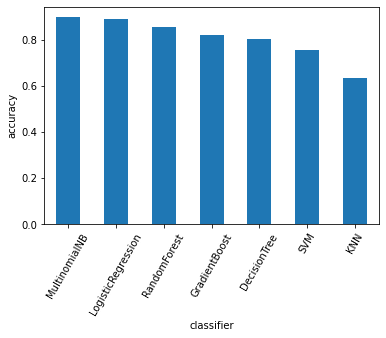

In [77]:
model_accuracy['accuracy'].plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('accuracy')

The accuracy for Naive Bayes model is quite high at 0.90. We will try a different vectoriser and see if we can improve the model further.

<h2><b>TF-IDF Vectorizer</h2></b>

TF-IDF, short for Term Frequency-Inverse Document Frequency, works by penalising the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents. The vector value it yields is the product of these two terms; TF and IDF.

Let's first look at TF.

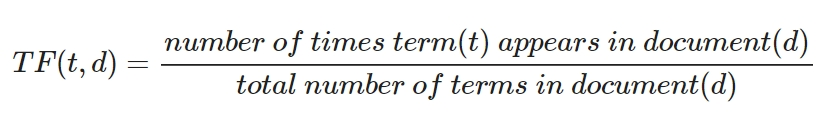

For example, we have two documents as shown below.
1. I like dogs.
2. I dislike cats and dogs.

The relative term frequency for 'I' in both document 1 and 2 will be:
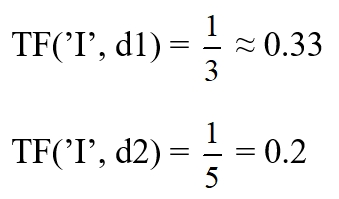

Next, we obtain the Inverse Document Frequency (IDF), which measures how important a word is to a document. 
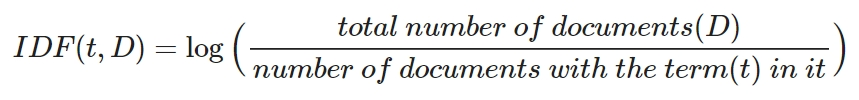

The IDF for 'I' would then be:
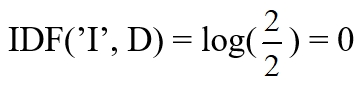

Since we have the values for TF and IDF, we can calculate TFIDF for term 'I' in documents 1 and 2.
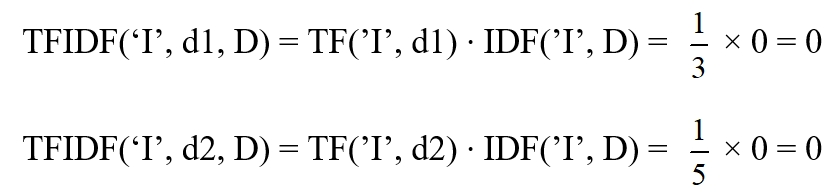

As the TFIDF score for the term 'I' in both documents is 0, it means that 'I' is not informative in differentiating documents. \
This is the same for count vectorizer and TFIDF vectorizer, which calculates the scores for terms in documents, then convert textual data into numeric form.

In [78]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

train_text = []

for text in train_df.titleNtext:
    train_text.append(text)
    
test_text = []

for text in test_df.titleNtext:
    test_text.append(text)
    

# instantiate td-idf vectorizer
vect = TfidfVectorizer()

train_tfidf_model = vect.fit_transform(train_text)
test_tfidf_model = vect.transform(test_text)


train_tfidf = pd.DataFrame(train_tfidf_model.toarray(), columns=vect.get_feature_names())
train_tfidf

,aadhithya,aap,aaps,aaron,abandon,abandoned,abandoning,abbreviated,abbvie,abc,...,zoonotically,zoster,zpak,zpakdr,zpaks,zpakthe,zte,zuckerberg,zurich,方啟泰
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
print(train_tfidf_model.shape)
print(test_tfidf_model.shape)

(786, 22421)
(337, 22421)


In [80]:
print(vect.get_feature_names())

['aadhithya', 'aap', 'aaps', 'aaron', 'abandon', 'abandoned', 'abandoning', 'abbreviated', 'abbvie', 'abc', 'abdominal', 'abetted', 'abide', 'ability', 'abjured', 'able', 'abnormal', 'abnormality', 'abnormally', 'aboard', 'abortion', 'abortionplanned', 'abound', 'aboutface', 'aboutfrancis', 'aboutmaking', 'aboutnobody', 'aboutshould', 'aboutsymptoms', 'aboutthis', 'aboveand', 'abovementioned', 'abovethe', 'abovewas', 'abreast', 'abroad', 'abroadairplanes', 'abroadlast', 'abroadthese', 'abruptly', 'abscess', 'absence', 'absent', 'absentee', 'absenteeism', 'absentmindedly', 'absolute', 'absolutely', 'absolutization', 'absorb', 'absorbable', 'absorbed', 'absorbent', 'absorbing', 'absorbs', 'absorption', 'abstract', 'absurd', 'absurdity', 'abundance', 'abundant', 'abundantly', 'abuse', 'abused', 'abusive', 'abuzz', 'abyss', 'ac', 'academia', 'academic', 'academically', 'academy', 'acc', 'accelerate', 'accelerated', 'acceleratedas', 'acceleratedfor', 'accelerates', 'accelerating', 'accelera

In [81]:
clsf = [LogisticRegression(),
        MultinomialNB(), 
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=200),
        KNeighborsClassifier(n_neighbors = 5)]

clsf_name = []

In [82]:
# define function to get accuracy score and report for each classifier

y_actual = test_df.label

i = 0
accuracy = []

for clsf in clsf:
    model = clsf.fit(train_tfidf_model, train_df.label)
        
    y_pred = model.predict(test_tfidf_model)
    a = (accuracy_score(y_pred, y_actual))
    accuracy.append(round(a,3))
    
    clsf_name.append(clsf.__class__.__name__)
    
    print("{} Accuracy Score : {}".format(clsf_name[i], round(a,3)))
    print(classification_report(y_pred, y_actual))
    i += 1

LogisticRegression Accuracy Score : 0.914
              precision    recall  f1-score   support

        fake       0.92      0.91      0.91       170
        real       0.91      0.92      0.91       167

    accuracy                           0.91       337
   macro avg       0.91      0.91      0.91       337
weighted avg       0.91      0.91      0.91       337

MultinomialNB Accuracy Score : 0.881
              precision    recall  f1-score   support

        fake       0.87      0.88      0.88       165
        real       0.89      0.88      0.88       172

    accuracy                           0.88       337
   macro avg       0.88      0.88      0.88       337
weighted avg       0.88      0.88      0.88       337

DecisionTreeClassifier Accuracy Score : 0.751
              precision    recall  f1-score   support

        fake       0.74      0.75      0.75       163
        real       0.76      0.75      0.76       174

    accuracy                           0.75       337
   

In [83]:
print(clsf_name)
print(accuracy)

['LogisticRegression', 'MultinomialNB', 'DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier']
[0.914, 0.881, 0.751, 0.869, 0.852]


In [84]:
sorted = pd.DataFrame({'classifier': clsf_name,
                      'accuracy' : accuracy}, index=None)
sorted = sorted.sort_values(by='accuracy',ascending=False)
sorted.set_index('classifier', inplace=True)
sorted

,accuracy
classifier,
LogisticRegression,0.914
MultinomialNB,0.881
RandomForestClassifier,0.869
KNeighborsClassifier,0.852
DecisionTreeClassifier,0.751


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'MultinomialNB'),
  Text(2, 0, 'RandomForestClassifier'),
  Text(3, 0, 'KNeighborsClassifier'),
  Text(4, 0, 'DecisionTreeClassifier')])

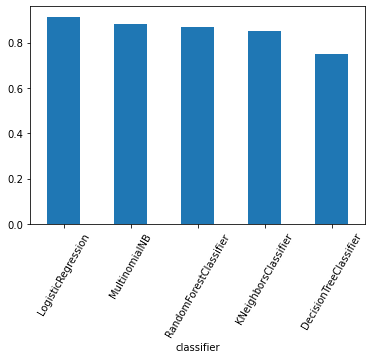

In [85]:
sorted['accuracy'].plot(kind='bar')
plt.xticks(rotation=60)

TF-IDF seems to work better than count vectorizer across all classifiers, with improvements in accuracy rate.

The accuracy for Logistic Regression is the best at 0.914. 

### <b>Hyperparameter tuning with Grid Search
We note that the above models were run with the default parameters determined by the modules. 
Could we improve the model by tuning the hyperparameters of the model?
    
To achieve this, we define a “grid” of parameters that we would want to test out in the model and select the best model using GridSearchCV.

In [86]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train_tfidf_model, train_df.label)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.924088 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.924088 (0.028375) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.924088 (0.028375) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.924088 (0.028375) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.921984 (0.028328) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.921984 (0.028328) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.921984 (0.028328) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.914335 (0.029773) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.914335 (0.029773) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.914763 (0.029619) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.890225 (0.037598) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.890225 (0.037598) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.889365 (0.036570) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.597133 (0.041576) wit

<b>With our best performing classifier (Logistic Regression) and the hyperparameter tuning above together with our TF-IDF vector dataset, we can inspect the top 30 vectors for fake and real news:

In [87]:
#get features names
vect = TfidfVectorizer()
classifier = LogisticRegression(C=100, penalty='l2', solver='newton-cg')
train_tfidf_model = vect.fit_transform(train_text)
train_tfidf = pd.DataFrame(train_tfidf_model.toarray(), columns=vect.get_feature_names())
classifier.fit(train_tfidf_model, train_df.label)

feature_names = vect.get_feature_names()

In [88]:
classifier.coef_[0].tolist()

[-0.011713555441292932,
 0.0022391572020625554,
 0.026265254045773456,
 0.4912197992490916,
 -0.4356597878765904,
 0.7394342685092062,
 0.031003851636799997,
 0.08059329535111467,
 0.3482536820738978,
 -0.09894191649213267,
 0.04915156222104867,
 -0.14279437054760802,
 0.0032928211107917556,
 -0.08250490346576518,
 -0.19599296872017405,
 0.5072467189186367,
 0.026734002440696916,
 0.46253449096432686,
 0.02962042912308792,
 0.002489102638149787,
 -0.15042307633148994,
 -0.0371944354598548,
 0.05474918011040088,
 0.0030549089855637446,
 -0.053967683330962156,
 -0.018499669433687756,
 -0.018499669433687756,
 -0.002965269731521797,
 0.19486544794858088,
 -0.058267351046399594,
 -0.030217311373025267,
 0.15491389661166818,
 0.02020268271604792,
 -0.012470001028603758,
 -0.10463180785106169,
 -0.6254721305903583,
 0.0005528959923333384,
 -0.005316343869889426,
 -0.06493413290271594,
 -0.14476665386915838,
 -0.030217311373025267,
 0.10554222673541137,
 -0.01799606648703366,
 -0.0070022951128

In [89]:
top_words = dict(zip(feature_names, classifier.coef_[0].tolist()))

In [90]:
top_real_words_df = pd.DataFrame.from_dict(top_words, orient='index', columns=['coefficient'])
top_fake_words_df = pd.DataFrame.from_dict(top_words, orient='index', columns=['coefficient'])

In [91]:
# top 30 real words
top_real_words_df.sort_values('coefficient', ascending=False, inplace=True)
top_real_words_df = top_real_words_df.rename_axis('word', axis=1)
top_real_words_df[:30]

word,coefficient
disease,7.666850
said,7.363460
symptom,5.837751
hand,5.325467
health,5.318987
new,5.131580
protect,4.272680
spread,4.150809
animal,4.001192
claim,3.891044


In [92]:
d = top_real_words_df[:30].to_dict()
d = d.pop('coefficient')

In [93]:
keys = list(d.keys())
print(keys)

['disease', 'said', 'symptom', 'hand', 'health', 'new', 'protect', 'spread', 'animal', 'claim', 'infection', 'wash', 'antibody', 'still', 'risk', 'soap', 'illness', 'community', 'distancing', 'social', 'develop', 'weather', 'taking', 'older', 'blood', 'evidence', 'infectious', 'transmitted', 'trial', 'transmission']


In [94]:
print("The top 30 words for real news are: '{}'.".format("', '".join([x for x in keys])))

The top 30 words for real news are: 'disease', 'said', 'symptom', 'hand', 'health', 'new', 'protect', 'spread', 'animal', 'claim', 'infection', 'wash', 'antibody', 'still', 'risk', 'soap', 'illness', 'community', 'distancing', 'social', 'develop', 'weather', 'taking', 'older', 'blood', 'evidence', 'infectious', 'transmitted', 'trial', 'transmission'.


In [95]:
# top 30 fake words
top_fake_words_df.sort_values('coefficient', ascending=True, inplace=True)
top_fake_words_df = top_fake_words_df.rename_axis('word', axis=1)
top_fake_words_df[:30]

word,coefficient
vitamin,-6.942213
wuhan,-5.532507
china,-5.390185
medium,-5.342763
chinese,-5.339701
tea,-4.791804
bill,-4.685794
gate,-4.312668
oil,-4.152532
zelenko,-4.135870


In [96]:
d1 = top_fake_words_df[:30].to_dict()
d1 = d1.pop('coefficient')
keys1 = list(d1.keys())
print("The top 30 words for fake news are: '{}'.".format("', '".join([x for x in keys1])))

The top 30 words for fake news are: 'vitamin', 'wuhan', 'china', 'medium', 'chinese', 'tea', 'bill', 'gate', 'oil', 'zelenko', 'corona', 'dna', 'air', 'military', 'government', 'remedy', 'simulation', 'kennedy', 'banana', 'dengue', 'world', 'patent', 'throat', 'flu', 'install', 'beard', 'show', 'elite', 'killed', 'united'.


In [97]:
classifier = LogisticRegression(C=100, penalty='l2', solver='newton-cg')
model = classifier.fit(train_tfidf_model, train_df.label)
y_pred = classifier.predict(test_tfidf_model)
y_actual = test_df.label
a = accuracy_score(y_pred, y_actual)
print("Accuracy Score : {}".format(round(a,3)))
print(classification_report(y_pred, y_actual))

Accuracy Score : 0.941
              precision    recall  f1-score   support

        fake       0.95      0.93      0.94       169
        real       0.94      0.95      0.94       168

    accuracy                           0.94       337
   macro avg       0.94      0.94      0.94       337
weighted avg       0.94      0.94      0.94       337



Text(0.5, 15.0, 'Predicted label')

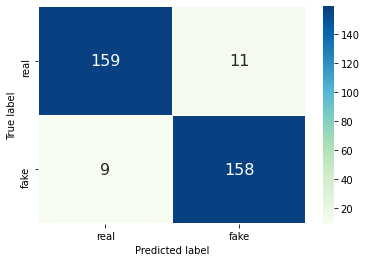

In [98]:
cm_final = confusion_matrix(y_actual, y_pred, labels=['real', 'fake'])

sns.heatmap(cm_final, annot=True,fmt='d', xticklabels=['real', 'fake'], yticklabels=['real', 'fake'], linewidths=.1, cmap="GnBu", annot_kws={"size": 16}) # font size
plt.ylabel("True label")
plt.xlabel("Predicted label")

# <b>Conclusion

We obtain a model with the highest accuracy of 0.941 after some hyperparameter tuning using Logistic Regression. 
    
The purpose of this work is to devise a solution that readers can utilise to detect and filter out sites containing false and misleading information.
Evidently, from the vectors, we find certain words which may indicate some degree of political intent appearing most in the top fake features (such as the words "chinese", "china" and "government"). 
    
Compared to real news, fake news tend to be more sensational, upsetting or geared to evoke anger or anxiety.

Interestingly, we observe that in the real news, the word "said" appear very frequently. This is likely due to newspapers and most journalistic publications quoting directly from sources ("Chancellor Angela Merkel said...").
    
For future works, we can explore other approaches such as using bigrams and trigrams for Bag-of-Words and TF-IDF, or deep learning based approach to differentiate real news and fake news.